
# Setup


## Import Modules




In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

from simpeg import maps
import simpeg.electromagnetics.time_domain as tdem
from simpeg.utils import plot_1d_layer_model

write_output = False
plt.rcParams.update({"font.size": 16})

# sphinx_gallery_thumbnail_number = 2

## Create Survey

# FDEM:

Measure response in real and imaginary ppm: 

"|Hs/Hp| (ppm)" refers to the normalized amplitude of the secondary magnetic field (Hs) relative to the primary magnetic field (Hp), expressed in parts per million (ppm). 

Real and Imaginary because of complex subsurface response to electromagnetic fields, with the real part capturing the in-phase resistive properties. 

The imaginary part represents how the electric and magnetic fields interact with the conductive target over time, including the phase shift introduced by induced currents.


**RESOLVE system**
frequencies = np.array([400, 1800, 3300, 8200, 40000, 140000], dtype=float)
receiver_location = np.array([7.86, 0.0, 30.0])
source_location = np.array([0.0, 0.0, 30.0])
x,y,z


Physical properties: Electrical conductivity Siemens per meter (S/m)


# TDEM


Geotech talk:
rx_times = np.logspace(np.log10(2e-5), np.log10(8e-3), 20)
diffusion_distance(1./rho_back, rx_times[-1])

### Source and receiver locationss:

source_location = np.array([0.0, 0.0, 30.0])
source_orientation = "z"  # "x", "y" or "z"
source_current = 1.0  # maximum on-time current
source_radius = 6.0  # source loop radius

### Receiver properties
receiver_location = np.array([0.0, 0.0, 30.0])
sources.CircularLoop



# RMS Calculation

1. Calculate the differences in both real and imaginary parts:
\begin{align}
\Delta_\text{real} &= \text{Real}_\text{with layer} - \text{Real}_\text{without layer}, \\
\Delta_\text{imag} &= \text{Imag}_\text{with layer} - \text{Imag}_\text{without layer}.
\end{align}

2. Calculate RMS for each:
\begin{align}
\text{RMS}_\text{real} &= \sqrt{\frac{1}{N} \sum_{i=1}^N \Delta_{\text{real}, i}^2}, \\
\text{RMS}_\text{imag} &= \sqrt{\frac{1}{N} \sum_{i=1}^N \Delta_{\text{imag}, i}^2},
\end{align}
where \( N \) is the number of data points.

3. Combine Real and Imaginary RMS:
\begin{align}
\text{RMS}_\text{combined} &= \sqrt{\text{RMS}_\text{real}^2 + \text{RMS}_\text{imag}^2}.
\end{align}

# Create Model Parameters

Varying variables: Conductivity, Depth, Thickness

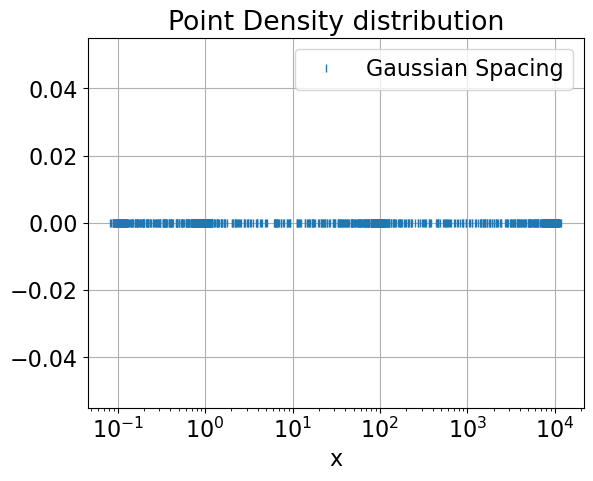

In [2]:
# Function to create data points:

def create_combined_gaussians(ranges, num_points, noise_percentage=0.0):
    """
    Create three Gaussian distributions for specified ranges and combine them into one output.

    Parameters:
    ranges : List of tuple ranges for the x-values as [(min1, max1), (min2, max2), (min3, max3)].
    num_points : Number of points for each Gaussian distribution [points1, points2, points3].
    noise_percentage : Percentage of Gaussian random noise (default is 0).

    Returns:
    --------
    x_combined : x-values of the combined distribution.
    """

    values = []

    for i, r in enumerate(ranges):

        mean = (r[0] + r[1]) / 2
        std_dev = (r[1] - r[0]) / 6


        # Generate Gaussian distribution over the entire range [min_val, max_val]
        gaussian = np.exp(-0.5 * ((np.linspace(r[0], r[1], num_points[i]) - mean) / std_dev) ** 2)
        
        # Normalize the Gaussian to ensure the sum of values equals 1
        gaussian /= np.sum(gaussian)
        
        # Cumulative sum to get spacing for x-values
        spacing = np.cumsum(gaussian)
        
        # Normalize the cumulative sum to map to the desired range [min_val, max_val]
        x = r[0]+ (r[1] - r[0]) * (spacing / spacing[-1])

        values.extend(x)
    
    # Add noise if specified
    if noise_percentage > 0:
        noise = np.random.normal(0, noise_percentage * np.abs(values), size=len(values))
        values += noise
        

    return np.array(values)

# Define parameters
ranges = [(1e-1, 1), (1, 1e2), (1e2, 1e4)]  # Ranges for each Gaussian
num_points = [300, 300, 300]          # Number of points per range       
noise_percentage = 0.1               # 10% noise


# Create combined Gaussians
x = create_combined_gaussians(ranges, num_points, noise_percentage)

plt.plot(x, np.zeros_like(x), '|', label="Gaussian Spacing")
plt.xlabel("x")
plt.xscale("log")
plt.title("Point Density distribution")
plt.grid(True)
plt.legend()
plt.show()


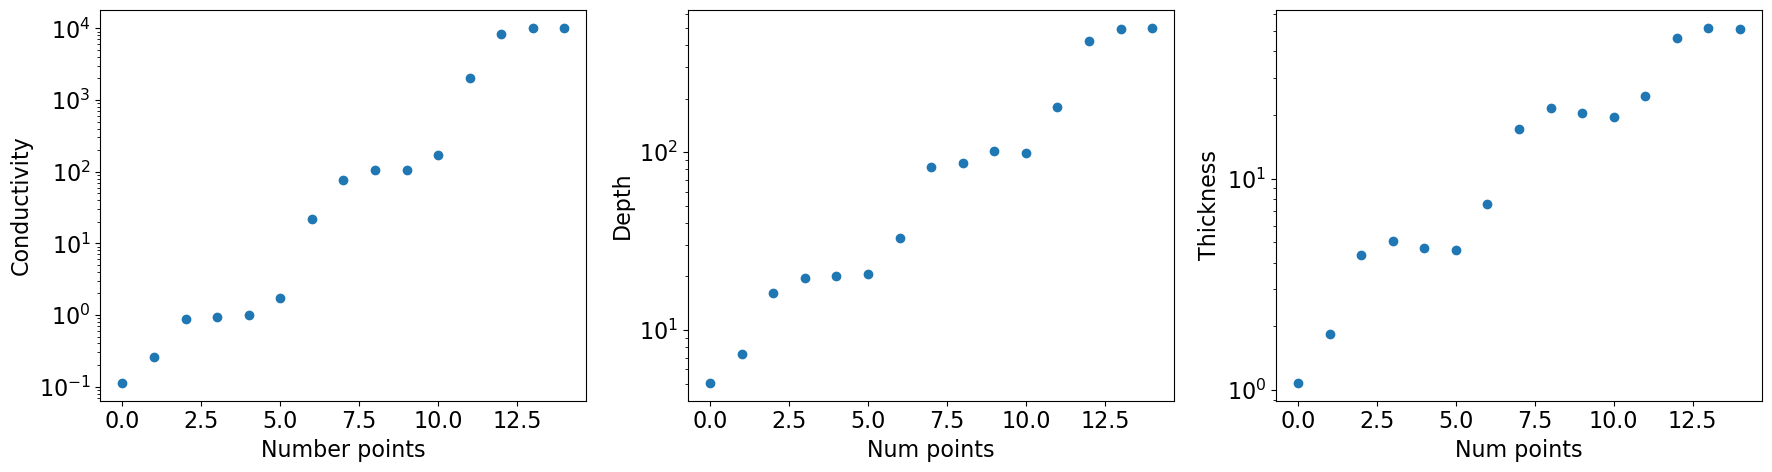

In [3]:
#Generate the values for different models: C: conductivity, D: depth of the layer, T: Thickness of the later

# Define parameters for the ranges
ranges_C = [(1e-1, 1), (1, 1e2), (1e2, 1e4)]  # Ranges for each Gaussian
ranges_D = [(5, 20), (20, 100), (100, 500)]  # Ranges for each Gaussian
ranges_T = [(1, 5), (5, 20), (20, 50)]  # Ranges for each Gaussian
num_points = [5, 5, 5]          # Number of points per range       
noise_percentage = 0.05               # 5% noise


# Create the data variables
C = create_combined_gaussians(ranges_C, num_points, noise_percentage)
D = create_combined_gaussians(ranges_D, num_points, noise_percentage)
T = create_combined_gaussians(ranges_T, num_points, noise_percentage)


plt.figure(figsize = (18, 5))
plt.subplot(1,3,1)
plt.scatter(np.arange(np.shape(C)[0]),C)
plt.yscale('log')
plt.xlabel("Number points")
plt.ylabel("Conductivity")

plt.subplot(1,3,2)
plt.scatter(np.arange(np.shape(D)[0]),D)
plt.yscale('log')
plt.xlabel("Num points")
plt.ylabel("Depth")

plt.subplot(1,3,3)
plt.scatter(np.arange(np.shape(T)[0]),T)
plt.yscale('log')
plt.xlabel("Num points")
plt.ylabel("Thickness")

plt.tight_layout()
plt.show()


In [4]:
# Save the data points

# Save conductivities
#np.savetxt('Conductivity.csv', C, delimiter=',', header='Index,Conductivity', comments='')

# Save D
#np.savetxt('Depth.csv', D, delimiter=',', header='Index,Depth', comments='')

# Save T
#np.savetxt('Thickness.csv', T, delimiter=',', header='Index,Thickness', comments='')

#print("Files saved in the current directory.")

In [5]:
# Function to define treatment:
def treatment_assignment(confounders):

    # Shuffle indices to randomize the order
    indices = np.random.permutation(confounders.shape[0])

    # Split the indices into two halves
    split_idx = len(indices) // 2
    indices_T, indices_F = indices[:split_idx], indices[split_idx:]

    # Create two subsets of the confounders array based on the split indices
    confounders_T = confounders[indices_T]
    confounders_F = confounders[indices_F]

    return confounders_T, confounders_F




#  Combine all variables in a single mesh with all possible values

# Create all possible combinations of C, D, and T
C_grid, D_grid, T_grid = np.meshgrid(C, D, T, indexing='ij')
confounders = np.vstack([C_grid.ravel(), D_grid.ravel(), T_grid.ravel()]).T

# Set the treatments
confounders_T, confounders_F = treatment_assignment(confounders)


# Combine all randomly

# Shuffle randomly each array independently
np.random.shuffle(C)
np.random.shuffle(D)
np.random.shuffle(T)

# Combine the shuffled arrays into a single array with 3 columns
confounders_r = np.vstack([C, D, T]).T

# Set the treatments
confounders_T_r, confounders_F_r = treatment_assignment(confounders_r)


print(confounders_r.shape)

(15, 3)


# Run experiment

In [6]:
# set solver 
from simpeg.utils.solver_utils import get_default_solver

Solver = get_default_solver()
Solver

pymatsolver.direct.mumps.Mumps

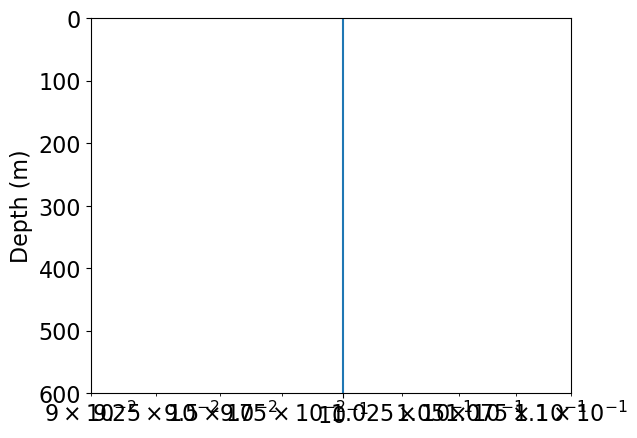

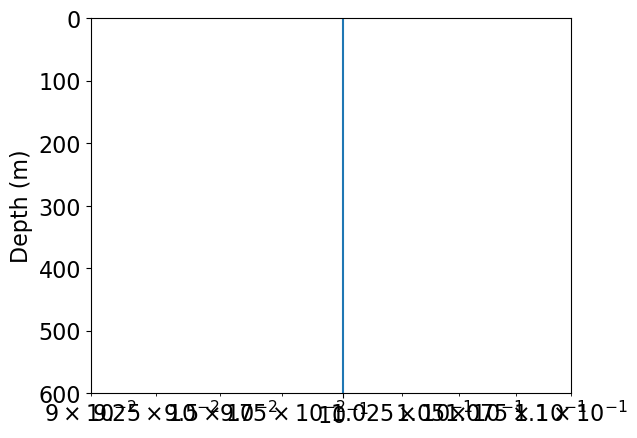

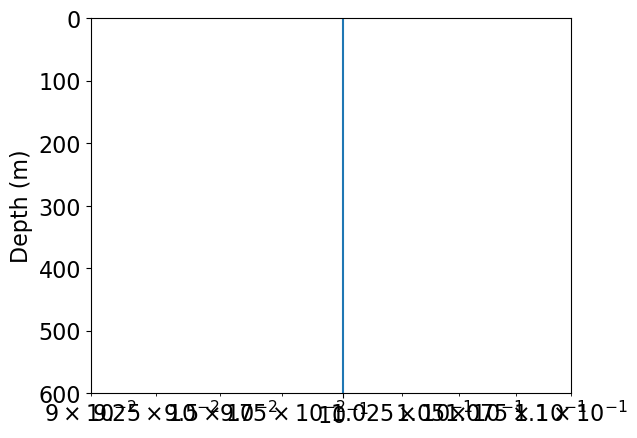

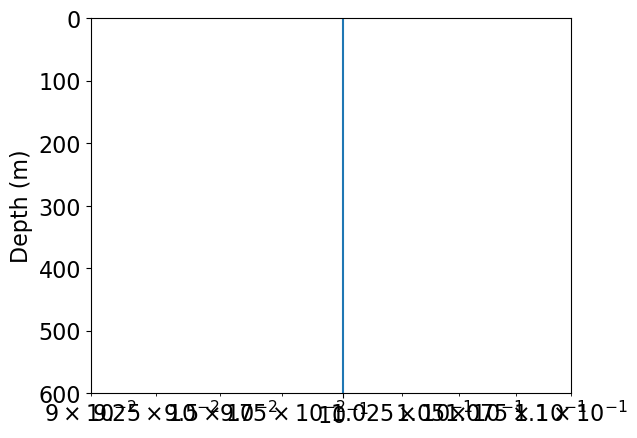

In [7]:
from FDEM import create_FDEMmodel, forward_FDEM, process_confounders_FDEM
from TDEM import create_TDEMmodel, forward_TDEM, process_confounders_TDEM

# A 2D array (n, 3) where each row contains conductivity, depth, and thickness.
results_TDEM_r = process_confounders_TDEM(confounders_T_r, plot = True)
results_TDEM = process_confounders_TDEM(confounders_T, plot = True)

results_FDEM_r = process_confounders_FDEM(confounders_F_r, plot = True)
results_FDEM = process_confounders_FDEM(confounders_F, plot = True)



2047.5670451989572


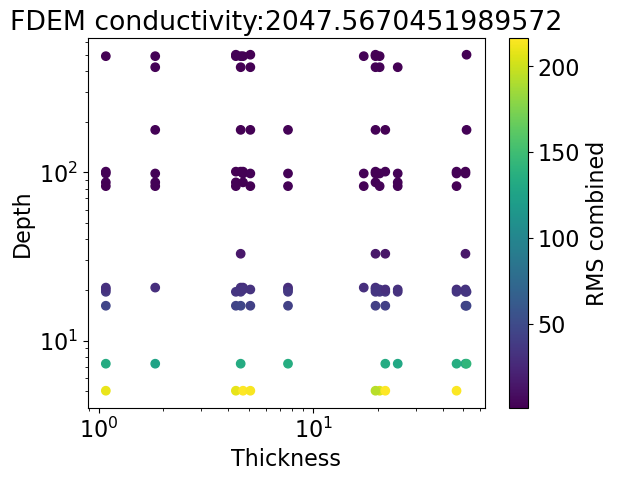

105.33611725129816


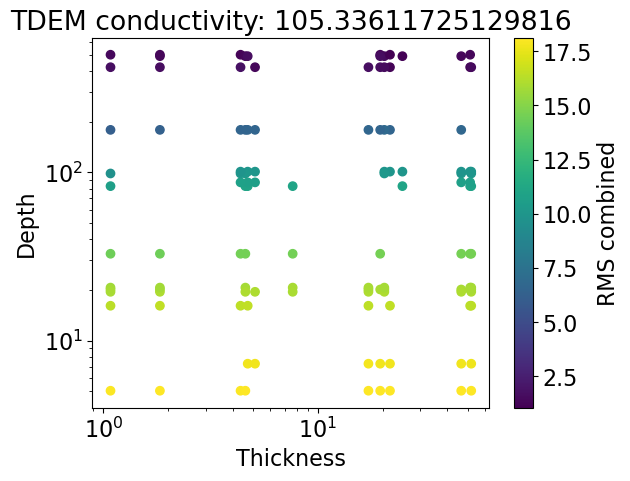

In [8]:

#Set given thickness:
val_conductivity = confounders_F[0, 0]
indices = confounders_F[:, 0] == val_conductivity # Create a boolean mask
print(val_conductivity)

plt.plot(figsize= (20, 10))

plt.scatter(confounders_F[indices,2], confounders_F[indices,1], c = results_FDEM[indices,-1])
# Add a colorbar to interpret the colors
plt.colorbar(label='RMS combined')
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Thickness')
plt.ylabel('Depth')
plt.title(f'FDEM conductivity:{val_conductivity}')

plt.show()

#Set given thickness:
val_conductivity = confounders_T[0, 0]
indices = confounders_T[:, 0] == val_conductivity # Create a boolean mask
print(val_conductivity)


plt.plot(figsize= (20, 10))

plt.scatter(confounders_T[indices,2], confounders_T[indices,1], c = results_TDEM[indices,-1])

# Add a colorbar to interpret the colors
plt.colorbar(label='RMS combined')
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Thickness')
plt.ylabel('Depth')
plt.title(f'TDEM conductivity: {val_conductivity}')

plt.show()

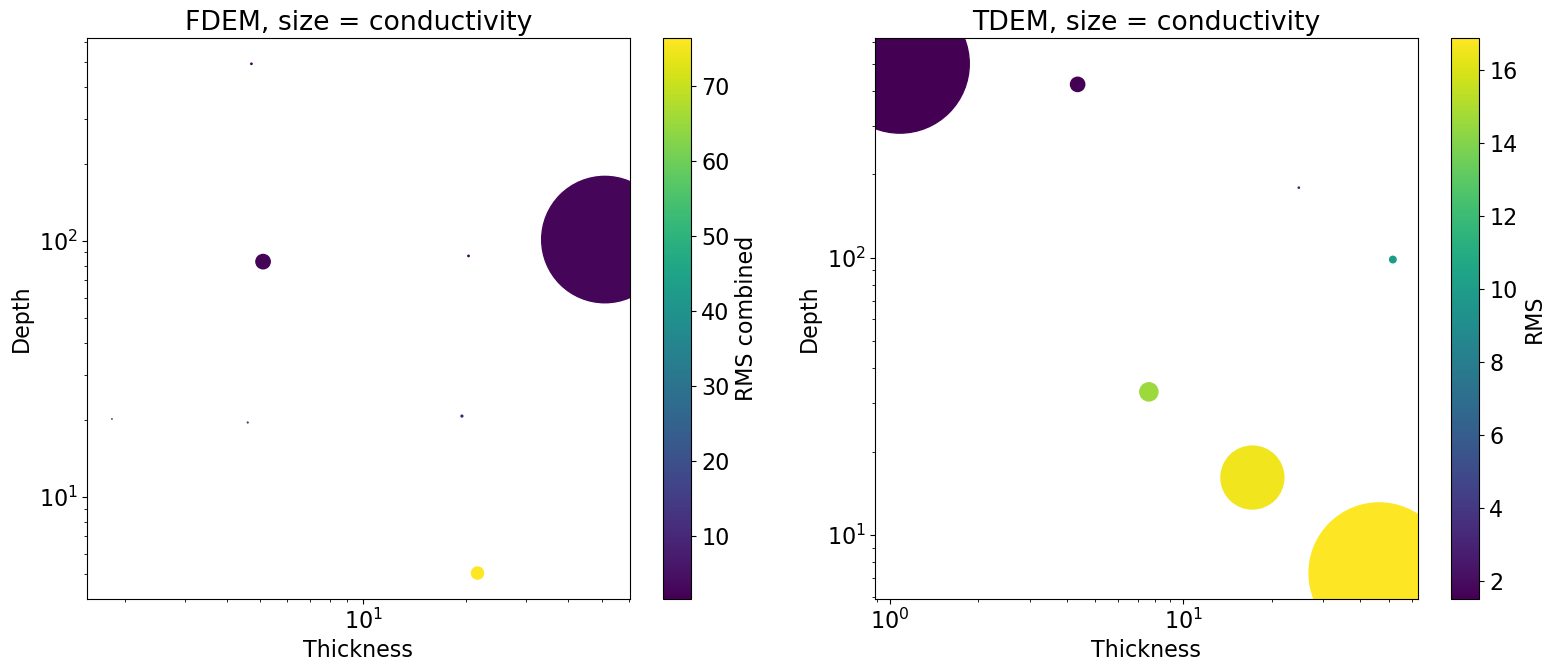

In [9]:
# Normalize the size for better visualization (optional)
size = confounders_F_r[:, 0]  # Example: normalize RMS for size (you can adjust this)

# Create the plot
plt.figure(figsize=(16, 7))

plt.subplot(1,2,1)

#Set size based on conductivity
size = confounders_F_r[:, 0]
scatter = plt.scatter(confounders_F_r[:, 2], confounders_F_r[:, 1], c=results_FDEM_r[:, -1], s=size, cmap='viridis')
# Add a colorbar to interpret the colors (RMS combined)
plt.colorbar(scatter, label='RMS combined')
# Set scales
plt.xscale('log')
plt.yscale('log')
# Add labels and title
plt.xlabel('Thickness')
plt.ylabel('Depth')
plt.title(f'FDEM, size = conductivity')


plt.subplot(1,2,2)
size = confounders_T_r[:, 0] 
scatter = plt.scatter(confounders_T_r[:, 2], confounders_T_r[:, 1], c=results_TDEM_r[:, -1], s=size, cmap='viridis')


# Add a colorbar to interpret the colors (RMS combined)
plt.colorbar(scatter, label='RMS')

# Set scales
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Thickness')
plt.ylabel('Depth')
plt.title(f'TDEM, size = conductivity')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
# Try do two plots, thickness v depth, and depth v condcutivity, conditcbity v thickness